<a href="https://colab.research.google.com/github/MJakash/Air_quality_index/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [6]:
df.shape

(9357, 15)

In [7]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [9]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


missing values are tagged with "-200" value as per UCI repo.

In [10]:
#checking existence of "-200" value in dataset
df.isin([-200]).sum(axis=0)

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


# Handling the missing value
Replacing all -200 with NaN and then replacing NaN value with mean of that specific column

In [11]:
df = df.replace(to_replace=-200,value=np.NaN)

In [12]:
#Actual missing values
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [13]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,NaN,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


Imputing missing values

In [14]:
num = df.select_dtypes(include=np.number).columns  # Select numeric columns
df[num] = df[num].fillna(df[num].mean())

In [15]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [16]:
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [17]:
df.drop(columns=['Date','Time'],inplace=True)

correlation matrix


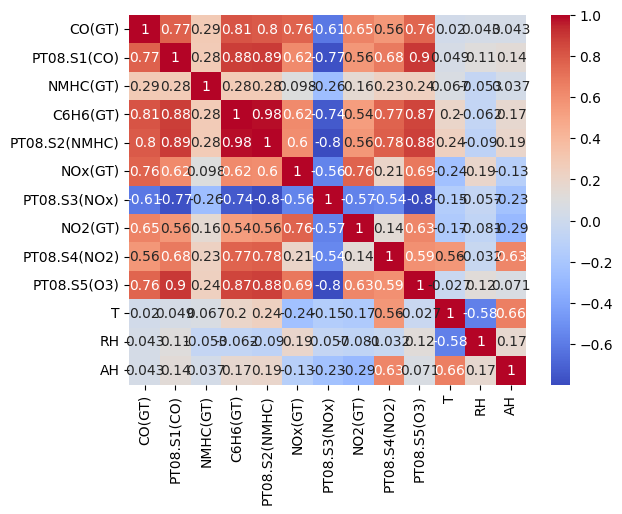

In [18]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Normalizing data using standardscaler


In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

target_column = 'CO(GT)'

X = df.drop([target_column], axis=1)
y = df[target_column]

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(X_scaled.head())


   PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0     1.223265 -1.077427  0.246331       0.407086 -0.418187      0.877450   
1     0.904868 -1.672415 -0.093922       0.060108 -0.743922      1.344223   
2     1.420648 -2.048197 -0.148612       0.000844 -0.599151      1.210150   
3     1.296109 -2.173458 -0.116980       0.035255 -0.387165      1.019468   
4     0.810876 -2.627528 -0.488185      -0.395839 -0.599151      1.468365   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0 -0.001720      0.695030     0.626540 -0.544709 -0.021054 -0.676520  
1 -0.479984      0.302364    -0.129371 -0.579359 -0.090280 -0.758039  
2  0.021055      0.289840     0.131134 -0.741061  0.279416 -0.695505  
3  0.203251      0.376035     0.462045 -0.845012  0.634383 -0.603357  
4  0.066604      0.099770     0.223302 -0.827686  0.609344 -0.598098  


Downloading dependencies


In [20]:
!pip install --upgrade scikit-learn


Model splitting and training using to ML regression algorithm:  RandomForestregressor


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [36]:
rf = RandomForestRegressor(random_state=42)

In [37]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

Evaluating model to get accuracy and error

In [39]:
from sklearn.metrics import r2_score
# Predict on the validation set
y_val_pred = rf.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: {val_rmse}")
print(f"RSquared value on validation: {r2_score(y_val, y_val_pred)}")

# Predict on the test set
y_test_pred = rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print(f"Test RMSE: {test_rmse}")
print(f"R-squared value on test: {r2_score(y_test, y_test_pred)}")

Validation RMSE: 0.5065204198647867
RSquared value on validation: 0.8525922491434936
Test RMSE: 0.4827630690206485
R-squared value on test: 0.8812106836317942
